# Impact of Math, Tutoring, and Math Blast Workshops On Math Test and GPA Outcomes

**Research Question:** What, if any impact does the role math, tutoring, or math blast have on a students GPA or math test scores? 


**Methodology** Students' attendance, test, and GPA data was collected from Fall 2016 through Fall 2019. Workshops were categorized as either "Math", "Math Blast" "Tutoring", or "Other Workshops" using the data available to make that determination.$^{1}$ Both the number of sessions, and time spent in sessions were used for evaluation purposes.

Students were then evaluated in three key ways: 
1. Does the time or number of sessions in the identified workshops over a student's CT career impact students' 11th Grade cumulative GPA, or highest math test score? 

2. Does the time or number of sessions in the identified workshops over a student's CT career impact students' GPA growth (from their first GPA to their 11th Grade CGPA) or their math test score growth (from their first math test score to their highest)?

3. Does the time or number of sessions in the identified workshops during a particular grade impact students' cumulative GPA or test scores during the following grade? 

For the first and second method, students were also grouped based on their incoming GPA or incoming math scores, to see if these workshops had a greater impact on students with below a 2.75 incoming GPA or below a 16 incoming math test score. 

For each method, a OLS regression was used to determine the statistical significance of students' attendance. For each regression, all workshop types (of the same unit type - i.e. sessions or duration) were included in the model (as distinct variables).

**Results:** Overall, there is little evidence any workshop has a strong positive impact on any of the three tested outcomes. Most models returned results that were either statistically insignificant, or more likely, statistically significant but with a coefficient of essentially 0. Even models that yielded positive coefficients indicate for a student to increase their ACT math score by one point, it would require them to attend 50 additional workshop sessions. 

This generally held true for all workshops types. 



**Assumptions and Data Manipulation:**
Due to limitations in some data availability, and consistency some assumptions and data manipulations had to be made. Two key manipulations stand out.
1. Some sites predominantly use SAT scores instead of the more common ACT scores for testing students. For these sites, SAT scores were converted into an equivalent ACT score using the official College Board guidelines. Note, this is why students were only evaluated on math test scores, and not English or cumulative test scores. Because the SAT combines reading and English scores, whereas the ACT does not - and not all our students have both ACT English and reading, it made comparing these scores more challenging. 

2. Most workshop records indicate the duration (in minutes) of a workshop session. However, this data is less consistently tracked and often for older records there is duration data. For these workshops, the assumption was made that the average workshop is 60 minutes. Thus any missing data was filled in based on this assumption. For most workshops, this likely is a safe assumption. However, for Math Blast workshops, they often are less frequent but longer sessions. There is a chance using this method under counted the true duration of a Math Blast workshop. Overall, the records that were filled - especially for Math Blast - were small, so this still feels like a safe assumption. 
 

In [20]:
%load_ext autoreload
%autoreload 2

In [22]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as smf
import sys

sys.path.append('../')
from src.helpers import create_regression_plots_row, create_regression_grid, create_regression_plots_overall, create_overall_chart

plt.style.use('college_track')
mpl.rcParams.update({'font.size': 8})


colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]




In [11]:
%matplotlib inline

In [49]:
ninth_grade = pd.read_pickle("../data/processed/ninth_grade.pkl")
tenth_grade = pd.read_pickle("../data/processed/tenth_grade.pkl")
eleventh_grade = pd.read_pickle("../data/processed/eleventh_grade.pkl")
overall_df_final = pd.read_pickle("../data/processed/overall.pkl")

In [50]:
overall_df_valid_first_gpa = overall_df_final[overall_df_final.first_gpa_grade != "11th Grade"]

overall_df_first_gpa_low = overall_df_valid_first_gpa[(overall_df_valid_first_gpa.first_gpa <= 2.75) ]

overall_df_valid_first_math = overall_df_final[overall_df_final.first_math_grade != overall_df_final.highest_math_score_grade]

overall_df_first_math_low = overall_df_valid_first_math[(overall_df_valid_first_math.first_gpa < 16) ]



## Charts

These overview charts detail the impact *individual* workshop types had on students' outcomes. They are helpful to understand the potential magnitude of impact, but they should not be viewed a statistically meaningful.

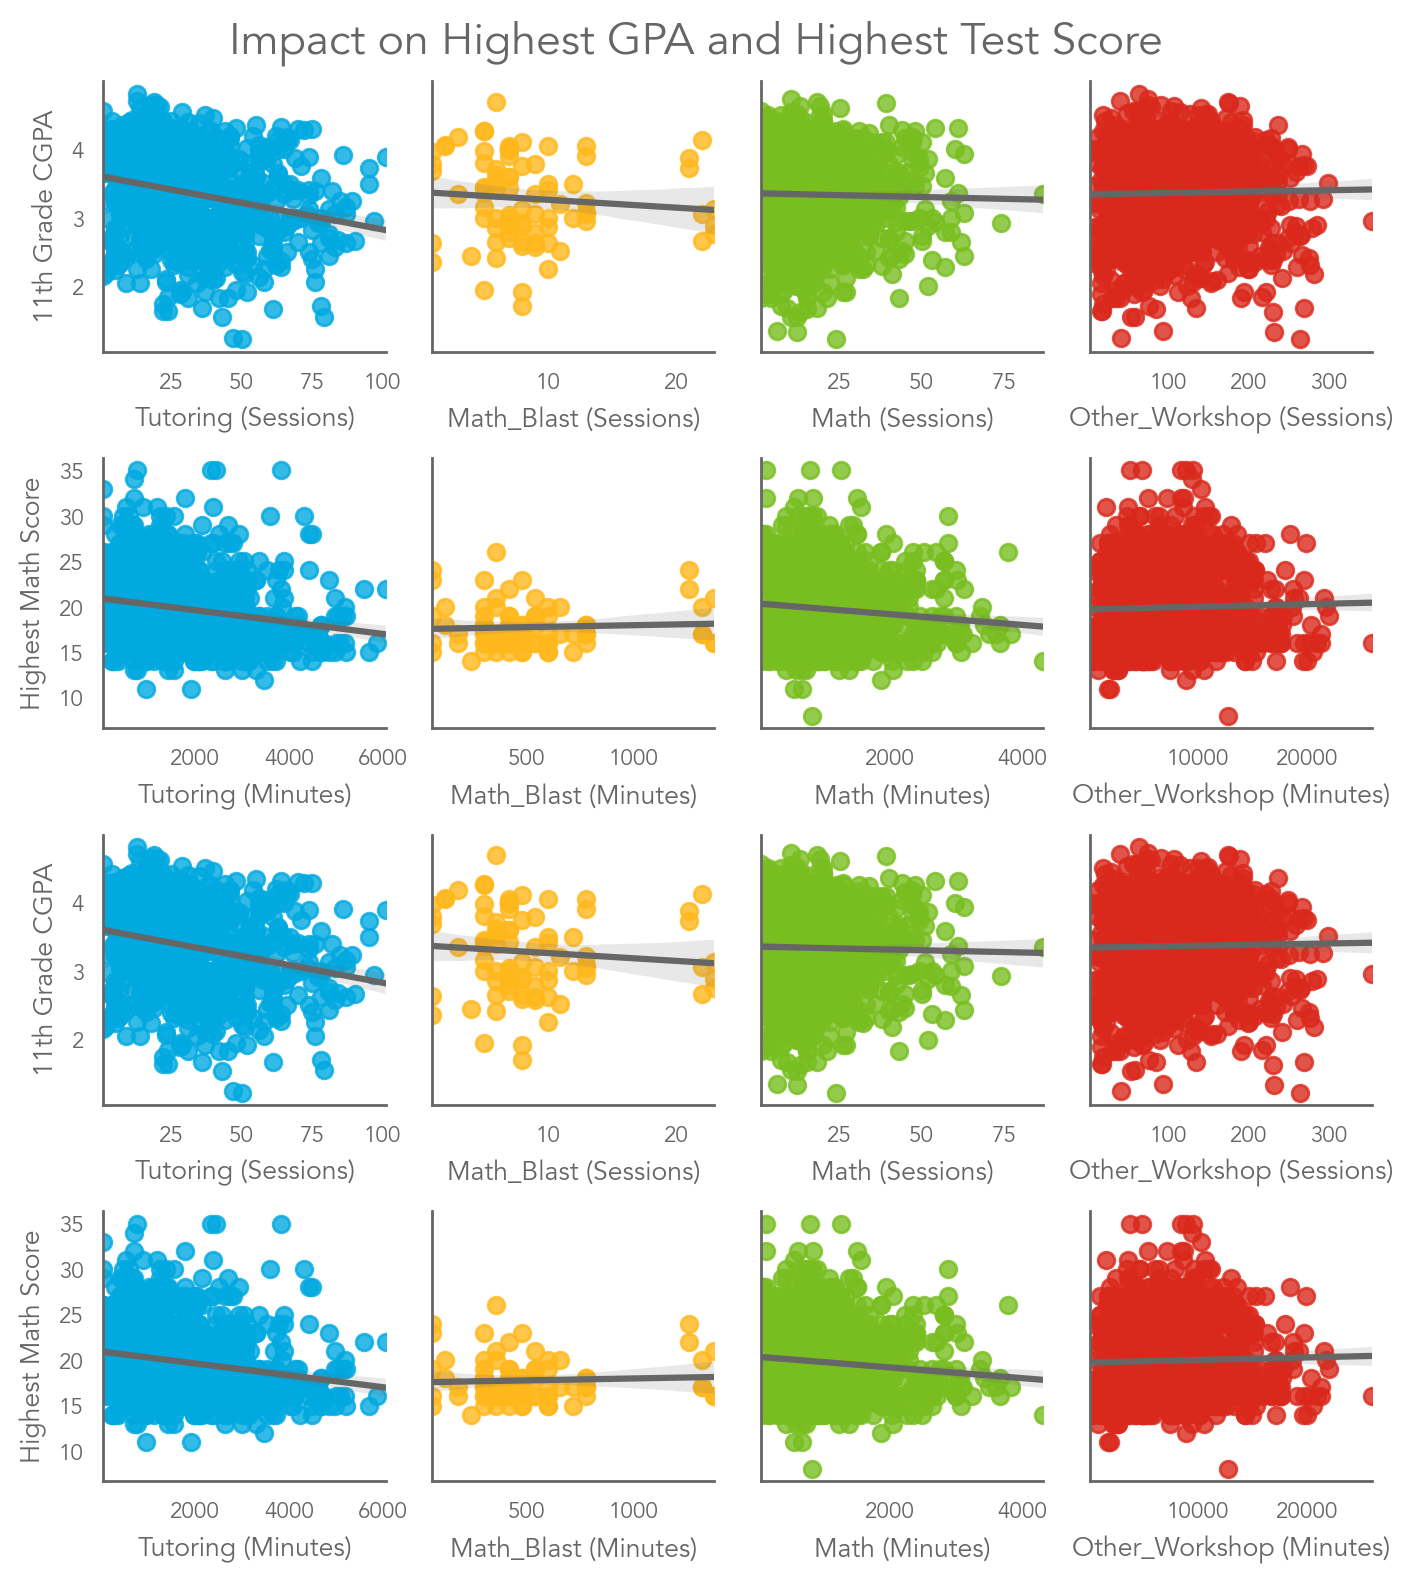

In [51]:
create_overall_chart(
    overall_df_final,
    overall_df_final,
    x_1="Attendance_Numerator",
    x_2='mod_duration_filled',
    y_1="HS_11th_Cum_GPA",
    y_2='highest_math_score',
    x_1_label="(Sessions)",
    x_2_label="(Minutes)",
    y_1_label="11th Grade CGPA", 
    y_2_label='Highest Math Score', 
    title="Impact on Highest GPA and Highest Test Score", colors=colors
)

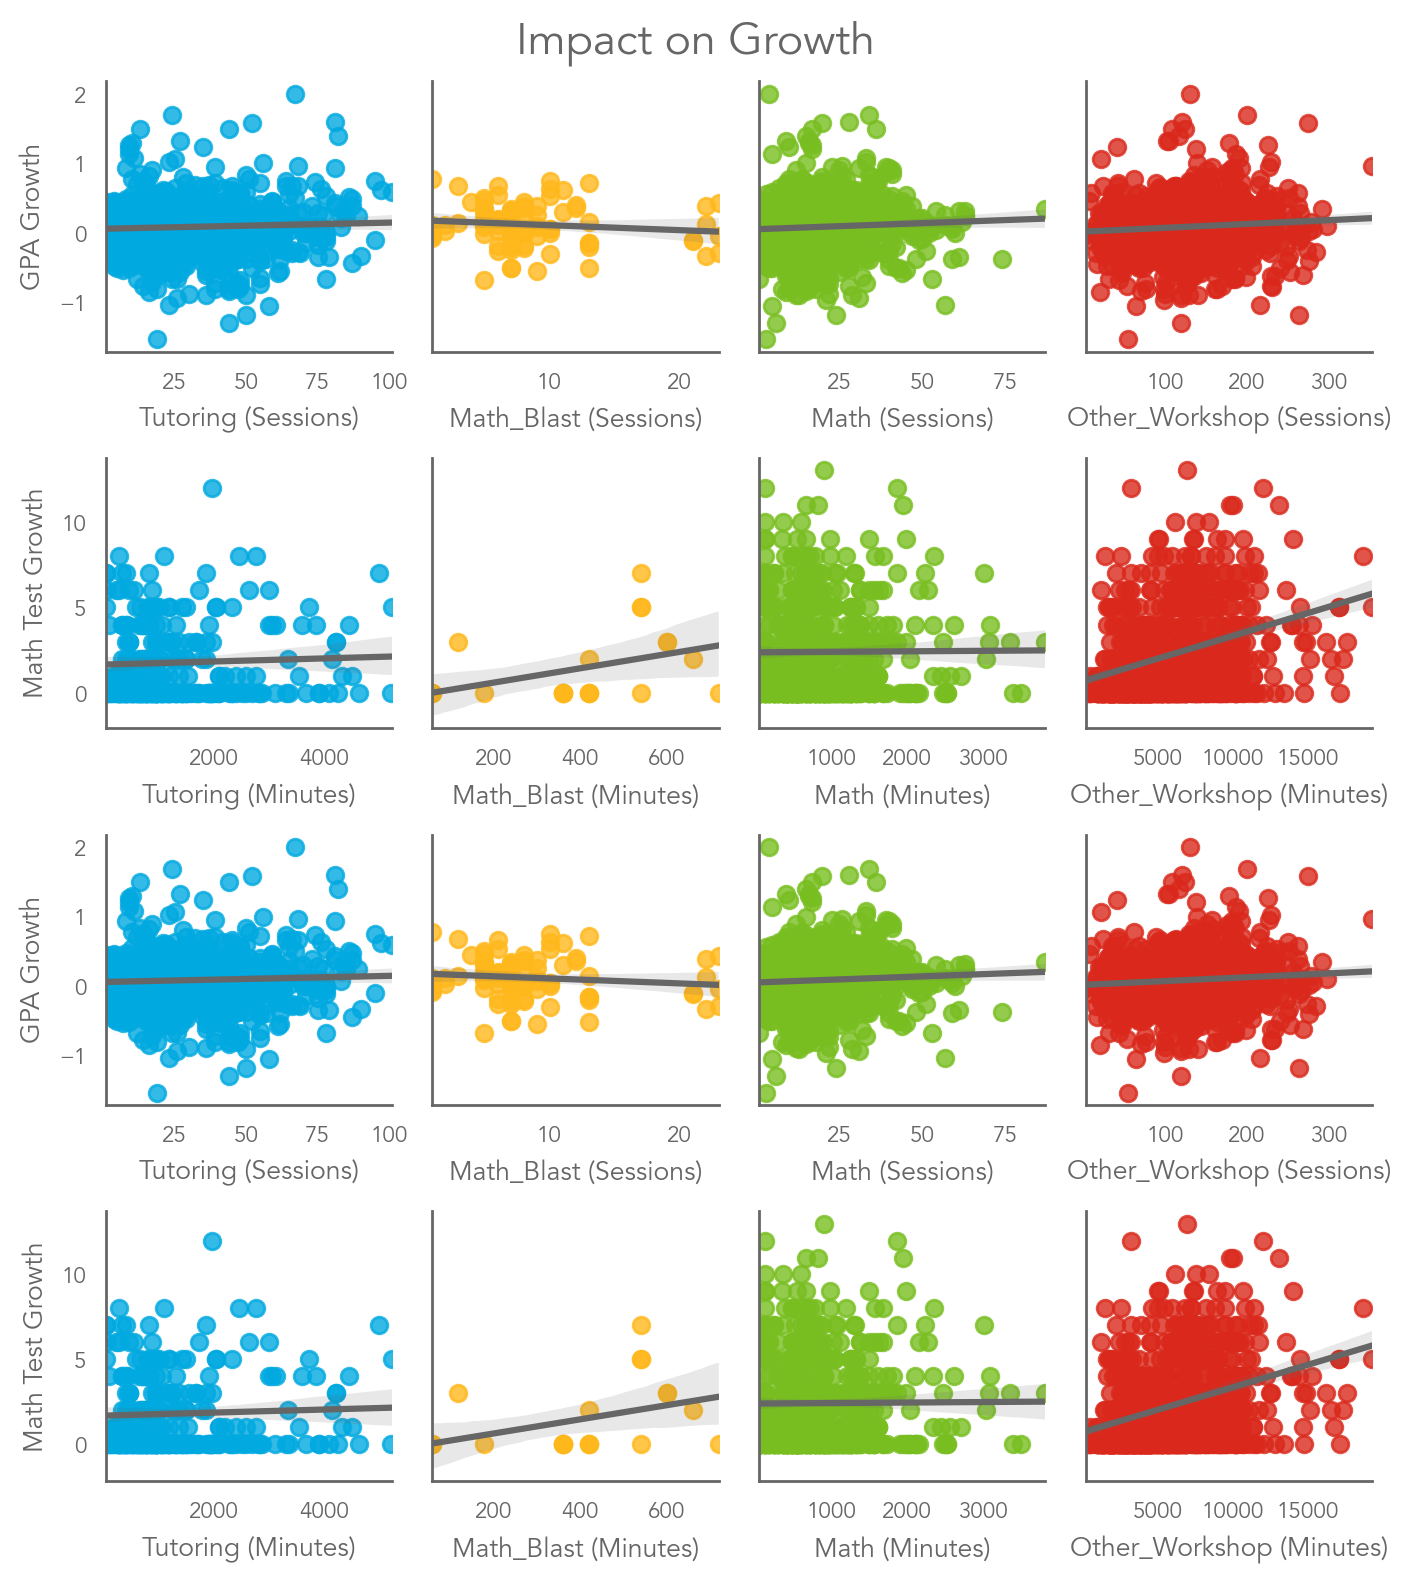

In [26]:
create_overall_chart(
    overall_df_valid_first_gpa,
    overall_df_valid_first_math,
    x_1="Attendance_Numerator",
    x_2='mod_duration_filled',
    y_1="gpa_growth",
    y_2='math_test_growth',
    x_1_label="(Sessions)",
    x_2_label="(Minutes)",
    y_1_label="GPA Growth", 
    y_2_label='Math Test Growth', 
    title="Impact on Growth", colors=colors
)

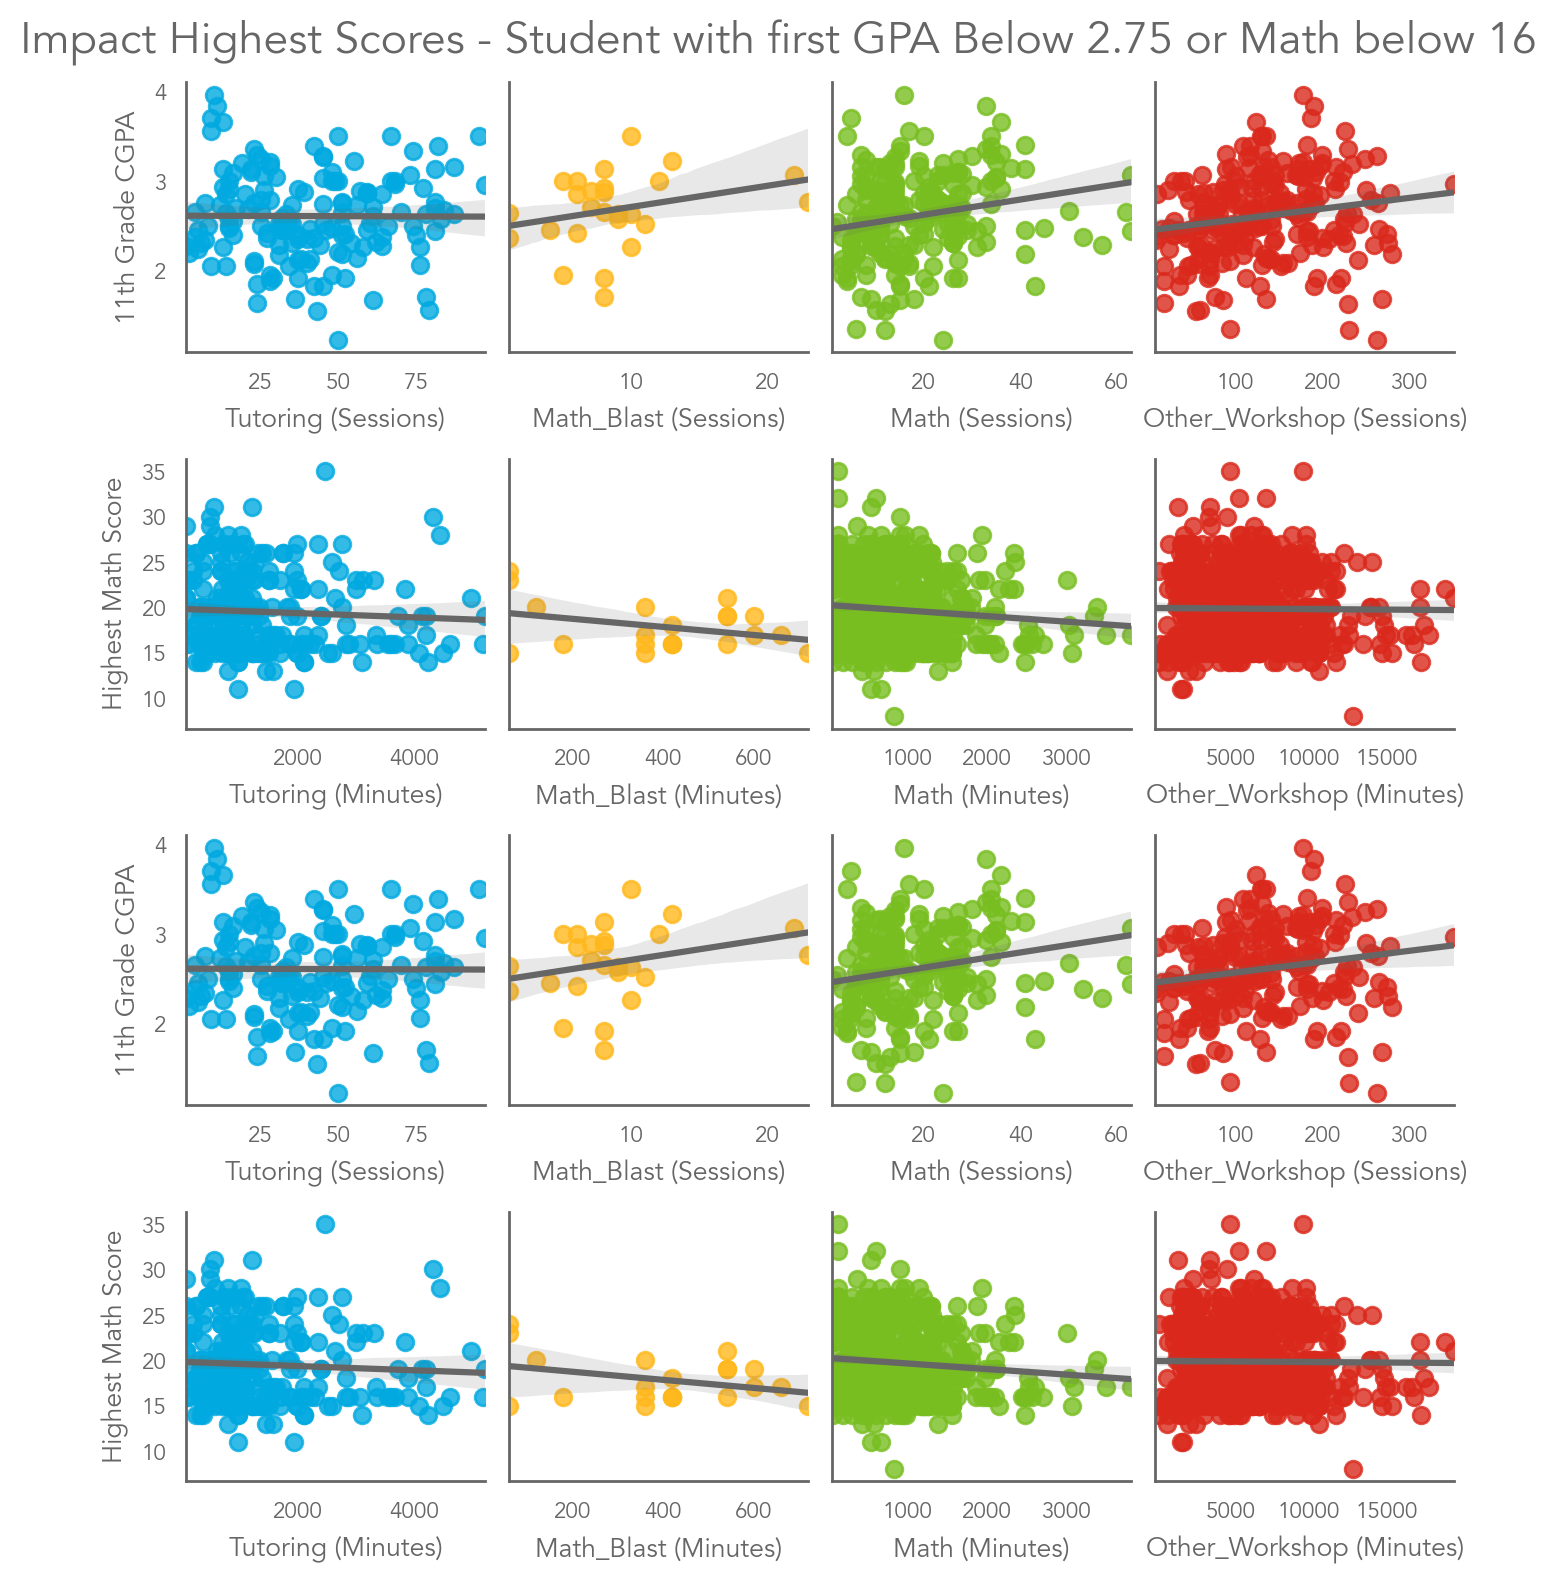

In [29]:
create_overall_chart(
    overall_df_first_gpa_low,
    overall_df_first_math_low,
    x_1="Attendance_Numerator",
    x_2='mod_duration_filled',
    y_1="HS_11th_Cum_GPA",
    y_2='highest_math_score',
    x_1_label="(Sessions)",
    x_2_label="(Minutes)",
    y_1_label="11th Grade CGPA", 
    y_2_label='Highest Math Score', 
    title="Impact Highest Scores - Student with first GPA Below 2.75 or Math below 16", colors=colors
)

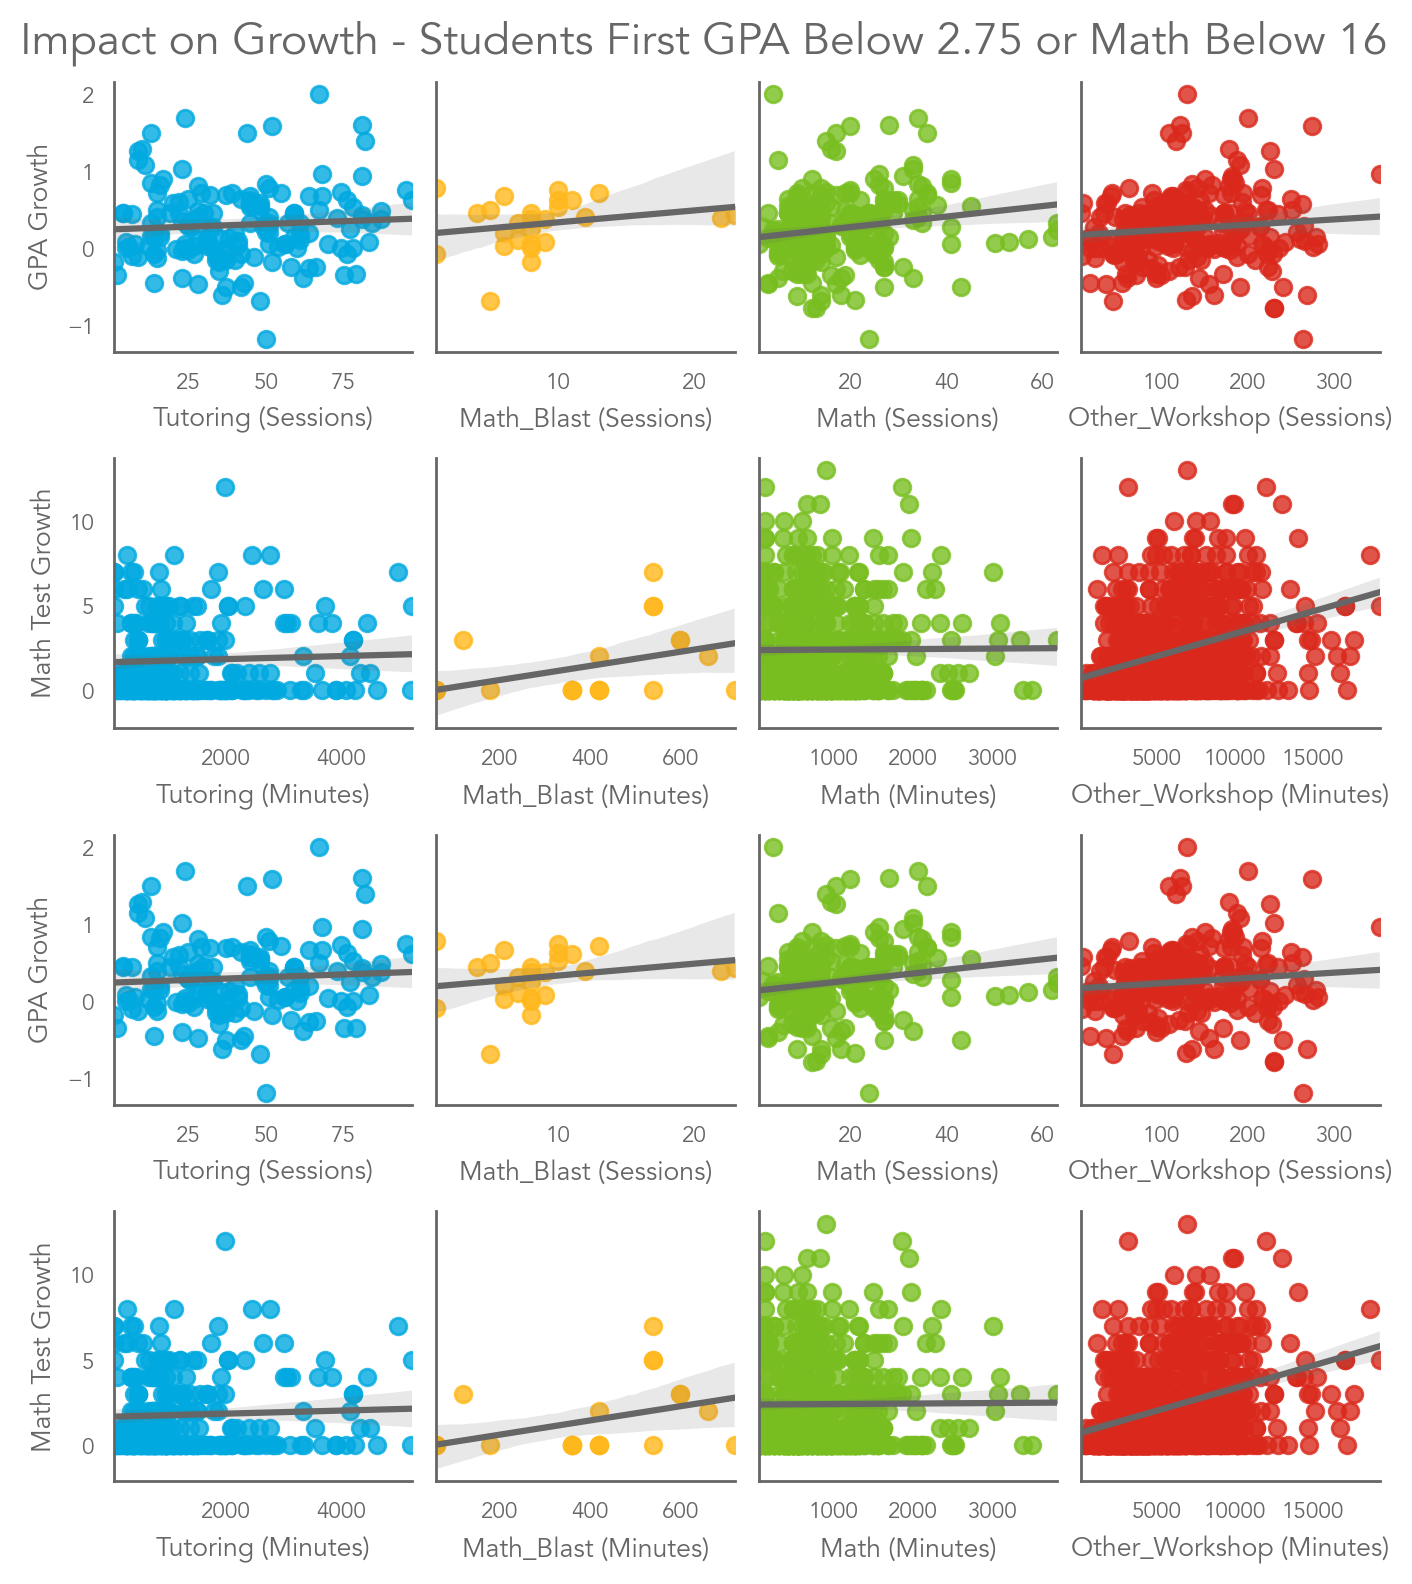

In [30]:
create_overall_chart(
    overall_df_first_gpa_low,
    overall_df_first_math_low,
    x_1="Attendance_Numerator",
    x_2='mod_duration_filled',
    y_1="gpa_growth",
    y_2='math_test_growth',
    x_1_label="(Sessions)",
    x_2_label="(Minutes)",
    y_1_label="GPA Growth", 
    y_2_label='Math Test Growth', 
    title="Impact on Growth - Students First GPA Below 2.75 or Math Below 16", colors=colors
)

## Selected Regressions

The following OLS regression results were selected based on relevant statistically significant results. 

Note, Math Blast was excluded from the regressions for two reasons. First, it isn't required for all students, and is only required for students doing poor in math - thus inherently biasing the model. Second, because it isn't required for all students, many students do not have relevant data. Generally, if a student is missing a variable in a regression model that student is removed from the model. By keeping Math Blast in the model it dramatically limited the number of valid observations. 

### Evaluating Impact on Highest GPA - Workshop Sessions

In [52]:
mod = smf.ols(formula='HS_11th_Cum_GPA ~  Attendance_Numerator_Math + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_final, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        HS_11th_Cum_GPA   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     21.27
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           3.21e-13
Time:                        16:53:01   Log-Likelihood:                -661.66
No. Observations:                 739   AIC:                             1331.
Df Residuals:                     735   BIC:                             1350.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Evaluating Impact on Highest Math Test Score - Workshop Sessions

In [54]:
mod = smf.ols(formula='highest_math_score ~  Attendance_Numerator_Math + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_final, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     highest_math_score   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     20.64
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           7.59e-13
Time:                        16:53:46   Log-Likelihood:                -2061.3
No. Observations:                 734   AIC:                             4131.
Df Residuals:                     730   BIC:                             4149.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Evaluating Impact on GPA Growth - Workshop Sessions

In [56]:
mod = smf.ols(formula='gpa_growth ~ Attendance_Numerator_Math + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_valid_first_gpa, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             gpa_growth   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.466
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0160
Time:                        16:54:13   Log-Likelihood:                -358.59
No. Observations:                 724   AIC:                             725.2
Df Residuals:                     720   BIC:                             743.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Evaluating Impact on Math Growth - Workshop Sessions

In [58]:
mod = smf.ols(formula='math_test_growth ~ Attendance_Numerator_Math  + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_valid_first_math, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       math_test_growth   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     8.022
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           4.81e-05
Time:                        16:54:44   Log-Likelihood:                -402.45
No. Observations:                 182   AIC:                             812.9
Df Residuals:                     178   BIC:                             825.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Evaluating Impact on GPA Growth For Students Below 2.75 GPA - Workshop Sessions

In [60]:
mod = smf.ols(formula='gpa_growth ~ Attendance_Numerator_Math  + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_first_gpa_low, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             gpa_growth   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.042
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.111
Time:                        16:55:25   Log-Likelihood:                -103.10
No. Observations:                 147   AIC:                             214.2
Df Residuals:                     143   BIC:                             226.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Evaluating Impact on Math Growth For Students Below 16 Math Score - Workshop Sessions

In [62]:


mod = smf.ols(formula='math_test_growth ~  Attendance_Numerator_Math + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_first_math_low, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       math_test_growth   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     8.022
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           4.81e-05
Time:                        16:55:48   Log-Likelihood:                -402.45
No. Observations:                 182   AIC:                             812.9
Df Residuals:                     178   BIC:                             825.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [6]:
%%html

<script>
$(document).ready(function(){
    window.code_toggle = function() {
        (window.code_shown) ? $('div.input').hide(250) : $('div.input').show(250);
        window.code_shown = !window.code_shown
    }
    if($('body.nbviewer').length) {
        $('<li><a href="javascript:window.code_toggle()" title="Show/Hide Code"><span class="fa fa-code fa-2x menu-icon"></span><span class="menu-text">Show/Hide Code</span></a></li>').appendTo('.navbar-right');
        window.code_shown=false;
        $('div.input').hide();
    }
});
</script>


<style>

div.prompt {display:none}


h1, .h1 {
    font-size: 33px;
    font-family: "Trebuchet MS";
    font-size: 2.5em !important;
    color: #2a7bbd;
}

h2, .h2 {
    font-size: 10px;
    font-family: "Trebuchet MS";
    color: #2a7bbd; 
    
}


h3, .h3 {
    font-size: 10px;
    font-family: "Trebuchet MS";
    color: #5d6063; 
    
}

.rendered_html table {

    font-size: 14px;
}

.output_png {
  display: flex;
  justify-content: center;
}

.cell {
    padding: 0px;
}


</style>